In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [128]:
# Specify the file path
file_path = r"C:\Users\Adminpc2\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Read the CSV file
df = pd.read_csv(file_path)

## Exploratory Data Analysis

### Remember:

The goal of exploratory data analysis is to understand the main characteristics of your data, uncover relationships between different variables, and extract important variables for the problem you’re trying to solve.

In [129]:
# Display the first few rows of the dataset to understand its structure and contents
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [123]:
# Convert the dictionary into DataFrame
df2 = pd.DataFrame(df)

# Get the unique values of 'B' column
df2.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [56]:
# Assuming 'df_final' is your DataFrame
# Check for NaN values in each column
nan_counts = df.isnull().sum()

# Print the results
print("Missing values per column:")
print(nan_counts)

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Identify the different Data types to exclude from Encoding later

If you identify that there is a **numerical value** in the dataframe that is not being printed out by the code below its probably formated to another datatype, that means you have to treat it early.

For Example: The **"TotalCharges"** Column it does not show up, but the table clears show it as a numerical

In [57]:
#Binary values
binary_columns = [col for col in df.columns if df[col].dropna().value_counts().index.isin([0,1]).all()]
print(binary_columns)

['SeniorCitizen']


In [58]:
# Print out the float columns
float_columns = df.select_dtypes(include=['float64']).columns
print("Float columns:")
print(float_columns)

Float columns:
Index(['MonthlyCharges'], dtype='object')


In [59]:
# Print out the int columns
int_columns = df.select_dtypes(include=['int64']).columns
print("\nInteger columns:")
print(int_columns)


Integer columns:
Index(['SeniorCitizen', 'tenure'], dtype='object')


In [60]:
# Exclude ‘Churn’ and 'TotalCharges' from the list of columns to be one-hot encoded
# categorical_cols = [col for col in df.select_dtypes(include=['object']).columns.tolist() if col not in ['SeniorCitizen','Churn','MonthlyCharges','SeniorCitizen', 'tenure']]

### Summery Statistics

Summery statistics provide a quick overview of the distribution of values in a column.

### Here’s a breakdown of what each term means:

**Count:** This is the total number of non-null observations in the column.

**Mean:** This is the average of all the numbers in the column. It’s calculated by adding up all the values and then dividing by the count.

**Std (Standard Deviation):** This measures the amount of variation or dispersion in the column’s values. A low standard deviation means that the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range.

**Min (Minimum):** This is the smallest value in the column.
25% (First Quartile): 25% of the data in the column is below this value. It’s also known as the lower quartile.

**50% (Median/Second Quartile):** This is the middle value of the column when it’s sorted in ascending order. If there’s an even number of observations, the median is the average of the two middle numbers. 50% of the data in the column is below this value.

**75% (Third Quartile):** 75% of the data in the column is below this value. It’s also known as the upper quartile.
Max (Maximum): This is the largest value in the column.

In [61]:
# Get the summary statistics of the numerical columns
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### Here are some additional insights that can be gleaned from summary statistics:

**Outliers:** If there’s a significant difference between the max (maximum) or min (minimum) value and the 75% (third quartile) or 25% (first quartile) respectively, it might suggest the presence of outliers in your data. Outliers are extreme values that fall far outside the range of the rest of the data.

**Spread of Data:** The std (standard deviation) can give you a sense of how spread out your data is. If the standard deviation is small, it means that most of your data is clustered around the mean. If it’s large, your data is spread out and varies a lot.

**Skewness:** As you mentioned, if the mean is greater than the median, the data is right-skewed, which means there are a minority of very large values. If the mean is less than the median, the data is left-skewed, indicating a minority of very small values.

**IQR (Interquartile Range):** The IQR, which is the difference between the 75% and 25% quartiles, represents the middle 50% of the data. This can give you a sense of the “typical” range of your data, as it’s not influenced by potential outliers.

**Zero Values:** If the min (minimum) value is zero, especially for features where a zero might be meaningful, it’s worth investigating why. Are these true zero values, or do they represent missing or undefined data?

Remember, these are just general guidelines and may not apply to every dataset or column. It’s always important to understand your data and the context in which it was collected.

### Let’s apply these concepts to the summary statistics you provided:

**Outliers:** For tenure and MonthlyCharges, the difference between the max and the 75% quartile is not significantly large, suggesting there might not be extreme high values. However, without a boxplot or further analysis, it’s hard to definitively say whether there are outliers.

**Spread of Data:** The std (standard deviation) for tenure and MonthlyCharges is relatively high, indicating that the data is spread out and varies a lot. For SeniorCitizen, since it’s a binary variable, the standard deviation doesn’t provide much insight.

**Skewness:** For tenure, the mean is slightly greater than the median, suggesting a slight right skew. For MonthlyCharges, the mean is less than the median, suggesting a slight left skew. SeniorCitizen is a binary variable, so skewness doesn’t apply here.

**IQR (Interquartile Range):** For tenure, the IQR is 55 - 9 = 46, and for MonthlyCharges, the IQR is 89.85 - 35.5 = 54.35. These ranges represent the middle 50% of the data and can give you a sense of the “typical” range of your data.

**Zero Values:** The min value for SeniorCitizen and tenure is zero. For SeniorCitizen, this is expected as it’s a binary variable (0 or 1). For tenure, a zero might indicate new customers who just joined.

Remember, these are just general interpretations based on the summary statistics. For a more accurate understanding, you would need to visualize the data and perform further analyses.

### Here are a few more observations that can be made from the summary statistics:

**SeniorCitizen:** As this is a binary variable (values are 0 or 1), the mean value of 0.162 suggests that about 16.2% of the customers are senior citizens. This could be useful in understanding the demographic of your customer base.

**tenure:** The maximum value is 72, which could mean that the company has been in business for 6 years (72 months) and they have customers who’ve been with them since the beginning. The minimum value of 0 could represent new customers. The mean value (32.37) being greater than the median (29) suggests that the tenure distribution might be slightly right-skewed, indicating a relatively higher number of customers with shorter tenures.

**MonthlyCharges:** The minimum charge of **18.25** and maximum of **118.75** shows the range of different pricing plans that might be available. The mean (average) monthly charge is **64.76**, but the median is **70.35**, suggesting that more than half of the customers pay above the average monthly charge.

## Box Plot

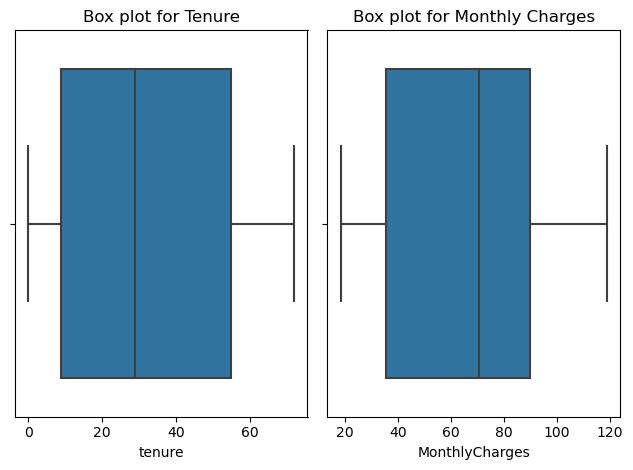

In [230]:
# Create a figure instance and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Create boxplot for 'tenure'
sns.boxplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Box plot for Tenure')

# Create boxplot for 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Box plot for Monthly Charges')

# Display the plots
plt.tight_layout()
plt.show()

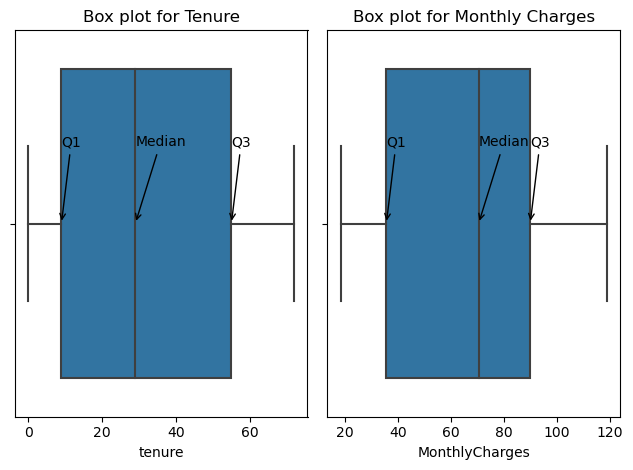

In [231]:
# Create a figure instance and a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Create boxplot for 'tenure'
sns.boxplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Box plot for Tenure')

# Create boxplot for 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Box plot for Monthly Charges')

# Add annotations for quartiles, median, and whiskers
for i, column in enumerate(['tenure', 'MonthlyCharges']):
    # Calculate quartiles and whiskers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = df[column].quantile(0.25) - 1.5*IQR
    upper_whisker = df[column].quantile(0.75) + 1.5*IQR
    median = df[column].median()

    # Add annotations for quartiles, median, and whiskers
    axes[i].annotate('Q1', xy=(Q1, 0), xytext=(Q1, -0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[i].annotate('Q3', xy=(Q3, 0), xytext=(Q3, -0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[i].annotate('Median', xy=(median, 0), xytext=(median, -0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[i].annotate('Lower Whisker', xy=(lower_whisker, 0), xytext=(lower_whisker, -0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[i].annotate('Upper Whisker', xy=(upper_whisker, 0), xytext=(upper_whisker, -0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Display the plots
plt.tight_layout()
plt.show()

### A guide you on how to interpret the box plot:

**The box:** The central box represents the values from the lower to upper quartile (Q1 to Q3). The range of values in the box is also known as the Inter-Quartile Range (IQR).

**Minimum (Lower Whisker):** This is the smallest data point excluding any outliers. It’s the leftmost or bottommost point of the whisker.
First Quartile (Q1): This is the 25th percentile of the data. It’s the left or bottom line of the box.

**Median (Q2):** This is the 50th percentile or the middle of the dataset. It’s the line inside the box. If this line is not in the center of the box, it suggests that your data is skewed.

**Third Quartile (Q3):** This is the 75th percentile of the data. It’s the right or top line of the box.

**Maximum (Upper Whisker):** This is the largest data point excluding any outliers. It’s the rightmost or topmost point of the whisker.

**Outliers:** These are individual points that fall outside of the whiskers. They’re usually represented as dots or asterisks.

To calculate these values, you can use the describe() function in pandas, which will give you the min, 25%, 50%, 75%, and max values (corresponding to the lower whisker, Q1, median, Q3, and upper whisker of the box plot).  

**Remember:** Outliers could indicate variability in the data, errors, or important but rare events.

In [62]:
print(df.shape) # print shape of dataframe

(7043, 21)


In [63]:
print(df.info()) # print concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
print(df.dtypes) # print data types of each column

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [65]:
# Count number of numerical values for each numerical feature
for col in df.columns:
    if df[col].dtype == 'int':
        print(f"{col}: {df[col].nunique()} numerical values")

In [67]:
# Count number of float values for each float feature
for col in df.columns:
    if df[col].dtype == 'float':
        print(f"{col}: {df[col].nunique()} float values")

MonthlyCharges: 1585 float values


In [68]:
# Count number of categorical values for each categorical feature
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} categorical values")


customerID: 7043 categorical values
gender: 2 categorical values
Partner: 2 categorical values
Dependents: 2 categorical values
PhoneService: 2 categorical values
MultipleLines: 3 categorical values
InternetService: 3 categorical values
OnlineSecurity: 3 categorical values
OnlineBackup: 3 categorical values
DeviceProtection: 3 categorical values
TechSupport: 3 categorical values
StreamingTV: 3 categorical values
StreamingMovies: 3 categorical values
Contract: 3 categorical values
PaperlessBilling: 2 categorical values
PaymentMethod: 4 categorical values
TotalCharges: 6531 categorical values
Churn: 2 categorical values


## Preprocessing

In [130]:
# cahnge the target column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [131]:
# Display the first few rows of the dataset to understand its structure and contents
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [132]:
from sklearn.preprocessing import OneHotEncoder
# Assuming df is your DataFrame
df = df.drop(columns=['customerID'])

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Exclude ‘Churn’ and 'MonthlyCharges' from the list of columns to be one-hot encoded
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns.tolist() if col not in ['SeniorCitizen', 'Churn', 'MonthlyCharges', 'tenure', 'TotalCharges']]


# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())

# Retrieve column names for categorical data
df_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop categorical columns from original df
df.drop(categorical_cols, axis=1, inplace=True)

# Merge the two dataframes using concat
df_final = pd.concat([df, df_encoded], axis=1)

In [133]:
# Display the first few rows of the dataset to understand its structure and contents
print(df_final.head())

   SeniorCitizen  tenure  MonthlyCharges TotalCharges  Churn  gender_Female  \
0              0       1           29.85        29.85      0            1.0   
1              0      34           56.95       1889.5      0            0.0   
2              0       2           53.85       108.15      1            0.0   
3              0      45           42.30      1840.75      0            0.0   
4              0       2           70.70       151.65      1            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0          0.0         0.0          1.0            1.0  ...   
1          1.0         1.0          0.0            1.0  ...   
2          1.0         1.0          0.0            1.0  ...   
3          1.0         1.0          0.0            1.0  ...   
4          0.0         1.0          0.0            1.0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                  0.0                      1.0                0.0   
1     

In [134]:
print(df_final.dtypes) # print data types of each column

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
gender_Female                              float64
gender_Male                                float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No              

In [135]:
print(df_final.shape) # print shape of dataframe

(7043, 46)


## Inspecting the TotalCharges Feature

In [136]:
# Print out the int columns
int_columns = df_final.select_dtypes(include=['int64']).columns
print("\nInteger columns:")
print(int_columns)


Integer columns:
Index(['SeniorCitizen', 'tenure', 'Churn'], dtype='object')


In [137]:
# Inspecting the Totalcharges feature
unique_values = df_final['TotalCharges'].unique()
print(unique_values)

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [138]:
# Inspecting the TotalCharges feature
num_unique_values = len(df_final['TotalCharges'].unique())
print(num_unique_values)

6531


In [139]:
# Replace spaces with NaN
df_final['TotalCharges'] = df_final['TotalCharges'].replace(' ', np.nan)

# Convert the column to float
df_final['TotalCharges'] = df_final['TotalCharges'].astype(float)

# Count the number of NaN values
num_missing_values = df_final['TotalCharges'].isna().sum()
print(num_missing_values)

11


In [140]:
print(df_final.shape)

(7043, 46)


## Handling the Missing Values in Totalcharges Feature

None of the simple imputation methods **(mean, median, or mode)** perfectly preserve the original distribution of values. They all introduce some level of bias because they replace missing values with a central tendency measure (mean, median) or the most frequent value (mode), which can distort the original distribution.

However, **Multiple Imputation by Chained Equations (MICE)** or **K-Nearest Neighbors (KNN) imputation** are more advanced techniques that can better preserve the original distribution. These methods estimate missing values based on other observations in the dataset, thereby maintaining the relationships between variables.

**MICE** works by creating multiple imputations (filling in the missing data multiple times). It uses all the other variables to estimate the missing values. The multiple filled-in datasets are then analyzed by using standard procedures for complete data and combining the results.

**MICE (Multiple Imputation by Chained Equations):** This method works well when the data is missing at random, and the missingness can be predicted by other variables. It creates multiple imputations and averages them, which can provide a more robust estimate of the missing values. However, it can be computationally intensive for large datasets.

**KNN** imputation fills in the missing values with the value of the nearest neighbor, as determined by some distance metric. It can be more accurate than mean, median, or mode imputation if the data points tend to cluster in the feature space.

**KNN (K-Nearest Neighbors) Imputation:** This method works well when the data has a natural structure that can be captured by a distance metric (for example, if similar customers in terms of demographics and usage patterns have similar churn rates). It’s less computationally intensive than MICE, but it might not perform as well if the missingness is related to unobserved variables.

These methods are more complex and computationally intensive than simple imputation methods, but they can provide more accurate results and better preserve the original distribution of your data. They are available in Python through libraries like sklearn and fancyimpute. 

In [141]:
# Get the columns with integer datatype
int_columns = df_final.select_dtypes(include=['int']).columns.tolist()

# Add 'TotalCharges' to the list
int_columns.append('TotalCharges')

# Print the data types of 'TotalCharges' and integer columns
print(df_final[int_columns].dtypes)

SeniorCitizen      int64
tenure             int64
Churn              int64
TotalCharges     float64
dtype: object


The code code will create a scatter plot matrix of the **integer features** and **“TotalCharges”** in your dataset. If you see any patterns or clusters in these plots, it indicates that your data might have a natural structure.

C:\Users\Adminpc2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


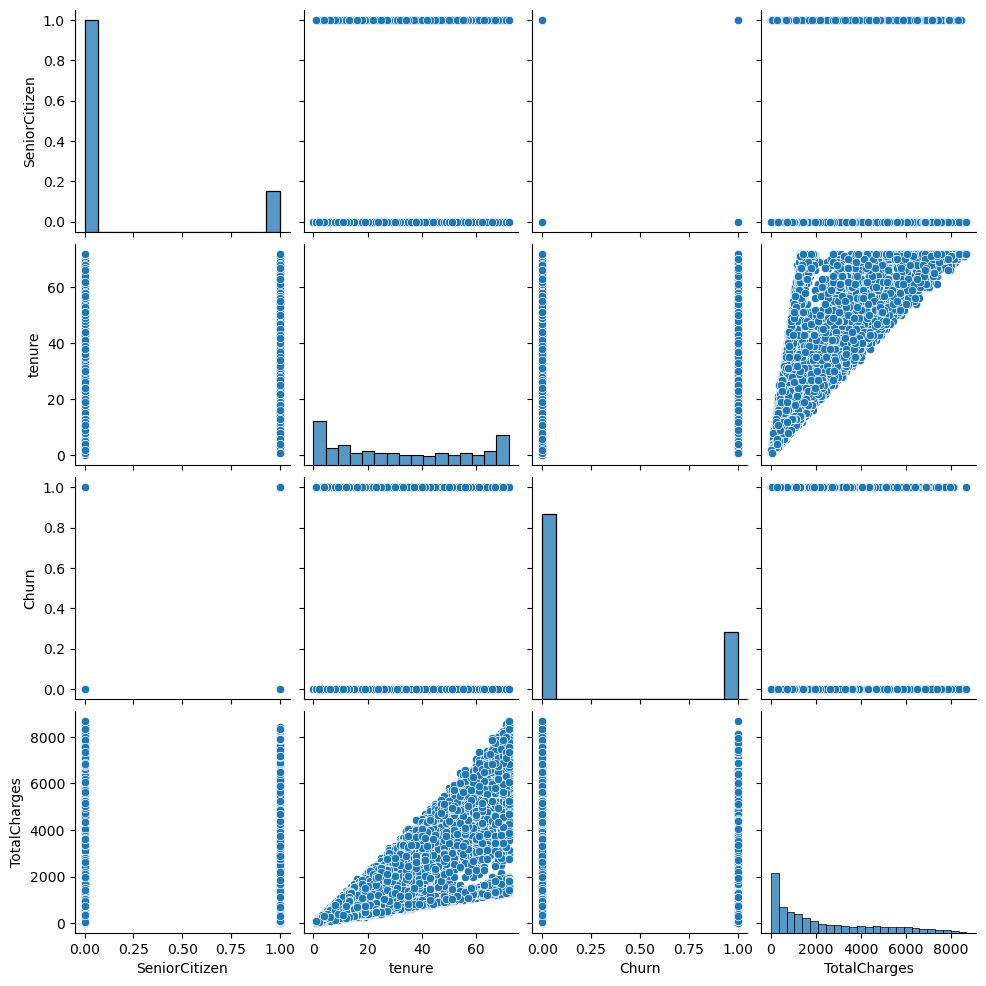

In [142]:
# Get the columns with integer datatype
int_columns = df_final.select_dtypes(include=['int']).columns.tolist()

# Add 'TotalCharges' to the list
int_columns.append('TotalCharges')

# Create scatter plots for each pair of integer features and 'TotalCharges'
sns.pairplot(df_final[int_columns])

plt.show()

The function below checks for **high correlation** between features and **low variance** in each feature. High correlation indicates that there might be a structure in the data, as similar customers might have similar churn behavior. Low variance means that most values in a feature are similar, which might affect the structure of the data.

In [143]:
def check_structure(df, columns):
    # Calculate the correlation matrix
    corr_matrix = df[columns].corr()

    # Check for high correlation between features
    for column in columns:
        high_corr = corr_matrix[column][corr_matrix[column] > 0.7].index.tolist()
        high_corr.remove(column)  # remove self-correlation

        if high_corr:
            print(f"The feature '{column}' has high correlation with features {high_corr}. This indicates a potential structure in the data.")

    # Check for low variance
    for column in columns:
        if df[column].var() < 0.1:
            print(f"The feature '{column}' has low variance. This indicates that most values are similar, which might affect the structure of the data.")

# Call the function
check_structure(df_final, int_columns)

The feature 'tenure' has high correlation with features ['TotalCharges']. This indicates a potential structure in the data.
The feature 'TotalCharges' has high correlation with features ['tenure']. This indicates a potential structure in the data.


Based on these findings:

The high correlation between **‘tenure’ and ‘TotalCharges’** indicates that there is a structure in your data. This suggests that customers with similar tenure tend to have similar total charges. This kind of structure is suitable for K-Nearest Neighbors (KNN) imputation.

The low variance in ‘TotalCharges_isna’ is expected because most of the values in this feature are similar (either 1 for missing or 0 for not missing). This feature was created just for analysis and won’t be included in the imputation process.

Given these results, it seems that using KNN imputation could be a good choice for handling missing values in the ‘TotalCharges’ feature. However, as always, it’s a good idea to experiment with different methods and evaluate their impact on your model’s performance.

In [144]:
# let’s proceed with K-Nearest Neighbors (KNN) imputation. 
# Here’s how you can do it using the KNNImputer class from the sklearn.impute module:
from sklearn.impute import KNNImputer
from sklearn.impute import KNNImputer

# Create the imputer object
imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to the 'TotalCharges' column
df_final['TotalCharges'] = imputer.fit_transform(df_final['TotalCharges'].values.reshape(-1,1))

# Check if there are any missing values left in 'TotalCharges'
missing_values = df_final['TotalCharges'].isna().sum()

if missing_values == 0:
    print("Successfully imputed")
else:
    print(f"Number of missing values in 'TotalCharges': {missing_values}")

Successfully imputed


In [145]:
# Count the number of NaN values
num_missing_values = df_final['TotalCharges'].isna().sum()
print(num_missing_values)

0


As you can see from the above results there are **no missing values** in the Feature **Totalcharges**

In [146]:
df_final.isnull().sum().sum()

0

## Feature Selection

## Use feature importance

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Assuming 'Churn' is your target variable and df_final is your DataFrame
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Get top 30 features
top_10_features = X.columns[sorted_indices[:30]]

# Create a new DataFrame with only the top 30 features
X_feature_importance = X[top_10_features]

In [148]:
nan_indices = y.index[y.isnull()]
print(f"Number of NaN values in 'y': {len(nan_indices)}")

Number of NaN values in 'y': 0


In [149]:
# Print out the list of features in X_feature_importance
features = X_feature_importance.columns.tolist()
print(features)

['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'InternetService_Fiber optic', 'TechSupport_No', 'SeniorCitizen', 'gender_Male', 'gender_Female', 'Contract_Two year', 'OnlineBackup_No', 'PaperlessBilling_Yes', 'DeviceProtection_No', 'PaperlessBilling_No', 'Partner_Yes', 'Partner_No', 'MultipleLines_No', 'OnlineBackup_Yes', 'MultipleLines_Yes', 'Dependents_No', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Dependents_Yes', 'StreamingMovies_Yes', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'DeviceProtection_Yes']


## RFE is used to select the top 10 features

In [150]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=30, step=1)

# Fit RFE
rfe = rfe.fit(X, y)

# Get the features selected by RFE
selected_features = X.columns[rfe.support_]

# Create a new DataFrame with only the selected features
X_rfe = X[selected_features]

In [151]:
# Print out the list of features in X_rfe
features = X_rfe.columns.tolist()
print(features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


## SelectKBest

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest class to extract top 30 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X.abs(), y)

# Get the features selected by SelectKBest
selected_features = X.columns[fit.get_support()]

# Create a new DataFrame with only the selected features
X_select_k_best = X[selected_features]

In [153]:
# Print out the list of features in X_select_k_best
features = X_select_k_best.columns.tolist()
print(features)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_No', 'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


In [154]:
print(df_final.shape)

(7043, 46)


## model training and evaluation

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000),  # Increase the number of iterations
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

# Define a list of feature sets
feature_sets = [X_feature_importance, X_rfe, X_select_k_best]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over each feature set
for i, X in enumerate(feature_sets):
    # Print the feature set number
    print(f'Feature set {i+1}:')
    
    # Iterate over each classifier
    for clf in classifiers:
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Print the results
        print(f'{clf.__class__.__name__}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 score: {f1}\n')



Feature set 1:


C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Accuracy: 0.8218594748048261
Precision: 0.6859756097560976
Recall: 0.6032171581769437
F1 score: 0.6419400855920114

RandomForestClassifier:
Accuracy: 0.7977288857345636
Precision: 0.664179104477612
Recall: 0.4772117962466488
F1 score: 0.5553822152886115



C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC:
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1 score: 0.0

KNeighborsClassifier:
Accuracy: 0.7743080198722498
Precision: 0.5907590759075908
Recall: 0.47989276139410186
F1 score: 0.5295857988165681

Feature set 2:


C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Accuracy: 0.8218594748048261
Precision: 0.6859756097560976
Recall: 0.6032171581769437
F1 score: 0.6419400855920114

RandomForestClassifier:
Accuracy: 0.7977288857345636
Precision: 0.6654135338345865
Recall: 0.4745308310991957
F1 score: 0.5539906103286385



C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC:
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1 score: 0.0

KNeighborsClassifier:
Accuracy: 0.7743080198722498
Precision: 0.5907590759075908
Recall: 0.47989276139410186
F1 score: 0.5295857988165681

Feature set 3:


C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
Accuracy: 0.8218594748048261
Precision: 0.6859756097560976
Recall: 0.6032171581769437
F1 score: 0.6419400855920114

RandomForestClassifier:
Accuracy: 0.7963094393186657
Precision: 0.6604477611940298
Recall: 0.4745308310991957
F1 score: 0.5522620904836193

SVC:
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1 score: 0.0

KNeighborsClassifier:
Accuracy: 0.7743080198722498
Precision: 0.5907590759075908
Recall: 0.47989276139410186
F1 score: 0.5295857988165681



C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Interpreating the Evaluation Metrics

In general, higher values for recall, F1 score, accuracy, and precision are desirable when evaluating classification models. Here’s why:

**Recall (Sensitivity):** This is the ratio of correctly predicted positive observations to the total actual positives. High recall indicates that the model is good at detecting the positive class.

**Precision:** This is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates that the model is not predicting the positive class when it’s actually negative.

**F1 Score:** This is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. A high F1 score is a sign of a well-performing model.

**Accuracy:** This is the ratio of correctly predicted observations to the total observations. High accuracy means that the model is good at predicting both the positive and negative class.

However, the importance of these metrics can vary depending on the problem at hand. For example, in a problem where **false negatives are very costly,** you might want to optimize for recall even at the expense of precision. Conversely, in a problem where **false positives are more costly,** you might want to optimize for precision.

Remember, no single metric can tell the whole story. It’s important to look at all these metrics to get a comprehensive understanding of your model’s performance.

## Determining which errors are more costly

In the context of predicting customer churn for a telecommunications company, the cost of false positives and false negatives can be considered as follows:

**False Positive:** A false positive would mean that the model predicts a customer will churn, but they actually do not. The cost here could be the unnecessary expenditure on retention strategies for customers who were not going to churn. This might include special discounts or offers aimed at preventing churn.

**False Negative:** A false negative would mean that the model predicts a customer will not churn, but they actually do. The cost here is potentially much higher, as the company loses a customer, which could have been prevented with appropriate retention strategies.

Typically, false negatives **(failing to identify customers who will churn)** are more costly in this scenario, as the loss of a customer can have a significant impact on revenue. Therefore, a model with a higher recall (fewer false negatives) might be more desirable.

However, it’s important to balance this with the cost of false positives, as unnecessary retention efforts can also consume resources. Therefore, the choice of model and the optimization of its parameters should consider both these aspects.

Remember, the ultimate goal is to maximize the overall performance of the model, which often involves a trade-off between these different metrics.

In [156]:
from sklearn.metrics import recall_score, precision_score

from sklearn.preprocessing import StandardScaler

# Initialize dictionaries to store the recall and precision scores for each feature set
recall_scores = {}
precision_scores = {}

# Iterate over each feature set
for i, X in enumerate(feature_sets):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize lists to store the recall and precision scores for each classifier
    recall_scores_feature_set = []
    precision_scores_feature_set = []
    
    # Iterate over each classifier
    for clf in classifiers:
        # Increase the maximum number of iterations for Logistic Regression
        if isinstance(clf, LogisticRegression):
            clf.max_iter = 1000
        
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate recall and precision scores
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred) if y_pred.any() else 0
        
        # Append the scores to the lists
        recall_scores_feature_set.append((clf.__class__.__name__, recall))
        precision_scores_feature_set.append((clf.__class__.__name__, precision))
    
    # Store the scores for this feature set
    recall_scores[i] = sorted(recall_scores_feature_set, key=lambda x: x[1], reverse=True)[:2]
    precision_scores[i] = sorted(precision_scores_feature_set, key=lambda x: x[1], reverse=True)[:2]

# Print the top 2 models with the highest recall and precision for each feature set
for i in range(len(feature_sets)):
    print(f'Feature set {i+1}:')
    print(f'Top 2 models with highest recall: {recall_scores[i]}')
    print(f'Top 2 models with highest precision: {precision_scores[i]}\n')

Feature set 1:
Top 2 models with highest recall: [('LogisticRegression', 0.5951742627345844), ('KNeighborsClassifier', 0.5040214477211796)]
Top 2 models with highest precision: [('SVC', 0.6951672862453532), ('LogisticRegression', 0.683076923076923)]

Feature set 2:
Top 2 models with highest recall: [('LogisticRegression', 0.5951742627345844), ('KNeighborsClassifier', 0.5335120643431636)]
Top 2 models with highest precision: [('SVC', 0.6953405017921147), ('LogisticRegression', 0.6851851851851852)]

Feature set 3:
Top 2 models with highest recall: [('LogisticRegression', 0.579088471849866), ('SVC', 0.5067024128686327)]
Top 2 models with highest precision: [('LogisticRegression', 0.6813880126182965), ('SVC', 0.6678445229681979)]



**We encounteres some errors while runing the code above**

It’s generally better to address the issues causing the warnings rather than just suppressing them. Here’s how you can modify your code to address the two warnings you’re seeing:

**UndefinedMetricWarning:** This warning is raised when precision is ill-defined, which happens when there are no predicted samples. To handle this, you can add a check before calculating precision to ensure there are predicted samples.

**ConvergenceWarning:** This warning is raised when the Logistic Regression model fails to converge, which means the maximum number of iterations is reached before the optimization algorithm is able to find the optimal parameters. You can increase the maximum number of iterations or scale your data to help the model converge.

## Testing Feature perfromance at diferrent Feature levels

I have selected only the best combination of feature sets, per given feature level:

### At 10 features:

**Feature set 2:**

Top 2 models with highest recall: [('SVC', 0.5764075067024129), ('LogisticRegression', 0.5737265415549598)]

Top 2 models with highest precision: [('LogisticRegression', 0.6645962732919255), ('SVC', 0.6635802469135802)]

### At 15 features:

**Feature set 2:**

Top 2 models with highest recall: [('LogisticRegression', 0.5951742627345844), ('KNeighborsClassifier', 0.5415549597855228)]

Top 2 models with highest precision: [('SVC', 0.6892857142857143), ('LogisticRegression', 0.6788990825688074)]

### At 20 features:

**Feature set 1:**

Top 2 models with highest recall: [('LogisticRegression', 0.5924932975871313), ('KNeighborsClassifier', 0.5549597855227882)]

Top 2 models with highest precision: [('SVC', 0.6855123674911661), ('LogisticRegression', 0.6737804878048781)]

### At 25 features:

**Feature set 1:**

Top 2 models with highest recall: [('LogisticRegression', 0.6058981233243967), ('KNeighborsClassifier', 0.5120643431635389)]

Top 2 models with highest precision: [('LogisticRegression', 0.6869300911854104), ('SVC', 0.6762589928057554)]

### At 30 features:

**Feature set 2:**

Top 2 models with highest recall: [('LogisticRegression', 0.5951742627345844), ('KNeighborsClassifier', 0.5335120643431636)]

Top 2 models with highest precision: [('SVC', 0.6953405017921147), ('LogisticRegression', 0.6851851851851852)]


### At 35 Features:

**Feature set 2:**

Top 2 models with highest recall: [('LogisticRegression', 0.5951742627345844), ('SVC', 0.5308310991957105)]

Top 2 models with highest precision: [('SVC', 0.6947368421052632), ('LogisticRegression', 0.6851851851851852)]

## Choosing the best Feature set and The Given Feature number

Based on the provided information, the best combination of recall and precision is achieved with **Feature set 2 at 30 features.**

At this point, the top 2 models with the highest recall are:

**1. Logistic Regression** with a recall of **0.595**

**2. K-Nearest Neighbors Classifier** with a recall of **0.534**

The top 2 models with the highest precision are:

**1. Support Vector Classifier (SVC)** with a precision of **0.695**

**2. Logistic Regression** with a precision of **0.685**

If you’re **prioritizing recall** but also want to ensure **decent precision,** you might want to consider using **Feature set 2 at 30 features.**

At this point, the **Logistic Regression model** gives the highest recall of 0.595. Although it’s not the model with the highest precision, its precision is still reasonably good at 0.685.

However, the choice of feature set and the number of features would ultimately depend on the specific requirements of your project, including the acceptable trade-off between recall and precision.

##  Improve the recall and precision of your model using Feature set 2 at 30 features

To improve the recall and precision of your model using Feature set 2 at 30 features, you can consider the following strategies:

**Feature Engineering:** You can create new features that might capture important information. This could be interaction terms, summary statistics, or decompositions.

**Hyperparameter Tuning:** You can tune the hyperparameters of your Logistic Regression model. For example, the regularization strength C in Logistic Regression is a hyperparameter that you can tune.

**Ensemble Methods:** You can use ensemble methods like Bagging and Boosting or even stacking multiple different models together. Ensemble methods can often boost performance by combining the strengths of several models.

**Address Class Imbalance:** If your dataset is imbalanced, it can affect the recall. You can use techniques like oversampling the minority class, undersampling the majority class, or using SMOTE (Synthetic Minority Over-sampling Technique) to make your dataset balanced.

**Use Different Evaluation Metric:** Precision and recall are just two aspects. You might want to look at the F1 score (the harmonic mean of precision and recall) or the ROC-AUC score which considers the trade-off between True Positive Rate and False Positive Rate.

Remember, machine learning model performance can often be improved with more data. If it’s possible to collect more data, that could potentially improve your model’s performance.

In [157]:
## cehck for class imbalance 
# Assume y is your target variable

class_distribution = y.value_counts()
print(class_distribution)

Churn
0    5174
1    1869
Name: count, dtype: int64


**Results Explained:**

The class distribution in your target variable 'Churn' indicates that there is indeed a class imbalance. Here's the distribution:

- Class 0 (No Churn): 5174 instances
- Class 1 (Churn): 1869 instances

This shows that the number of instances of Class 0 (No Churn) is significantly higher than the number of instances of Class 1 (Churn). This imbalance could potentially bias your model towards predicting the majority class (No Churn).

To address this issue, you can consider techniques such as:

1. **Oversampling the minority class (Churn)**: This involves randomly duplicating examples in the minority class to increase its proportion. One common method for oversampling is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic examples rather than creating exact copies of instances.

2. **Undersampling the majority class (No Churn)**: This involves randomly deleting examples from the majority class to decrease its proportion. However, this method might result in loss of information.

3. **Combination of Oversampling and Undersampling**: This involves applying both oversampling and undersampling to create a balanced dataset.

Remember, the choice of method would depend on your specific use case and the nature of your data. It's always a good idea to experiment with different methods and see which one works best for your specific scenario.

**Disadvantages and Advantages of each method**

Here are the advantages and disadvantages of the methods mentioned:

1. **Random Oversampling**
    - Advantages:
        - It's a simple and straightforward method to make the class distribution balanced.
        - It can improve the performance of the model on the minority class.
    - Disadvantages:
        - It can cause overfitting due to the duplication of data points.
        - It increases the likelihood of occurring overfitting since it replicates the minority class events.

2. **Random Undersampling**
    - Advantages:
        - It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.
    - Disadvantages:
        - It can discard potentially useful information which could be important for building rule classifiers.
        - The sample chosen by random under sampling may be a biased sample. And it will not be an accurate representative of the population. Thereby, resulting in inaccurate results with the actual test data set.

3. **Class Weight Adjustment**
    - Advantages:
        - It's easy to use because you only need to adjust the `class_weight` parameter of the algorithm.
        - It doesn't cause information loss, as it doesn't involve removing instances from the majority class or adding synthetic instances to the minority class.
    - Disadvantages:
        - It can introduce its own issues, like making the algorithm more sensitive to errors in the minority class.
        - This method might not be effective if the dataset is highly imbalanced.

Remember, the choice of method will depend on your specific use case and the nature of your data. It's always a good idea to experiment with different methods and see which one works best for your specific scenario.

**Based on target distribution:**

- Class 0 (No Churn): 5174 instances
- Class 1 (Churn): 1869 instances

There is indeed an imbalance in your dataset. The 'No Churn' class has about 2.8 times more instances than the 'Churn' class. 

While there's no strict rule that defines when a dataset is considered "highly" imbalanced, a common threshold is when the **minority class constitutes less than 10%** of the total instances. In your case, the **'Churn' class makes up about 26.5%** of the total instances, so while it's imbalanced, **it might not be considered "highly" imbalanced.**

However, this imbalance could still potentially bias your model towards predicting the majority class (No Churn). Therefore, it's a good idea to address this imbalance to improve your model's performance on the minority class (Churn). You can use the methods I mentioned earlier to handle this imbalance.

so we will use  **Class Weight Adjustment**

## First, train a Logistic Regression model with class weight adjustment:

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assume X_rfe and y are your features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Scale only the 'tenure' and 'MonthlyCharges' features
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

# Create a logistic regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print classification report
report = classification_report(y_test, predictions, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion Matrix and ROC Curve For LogisticRegression

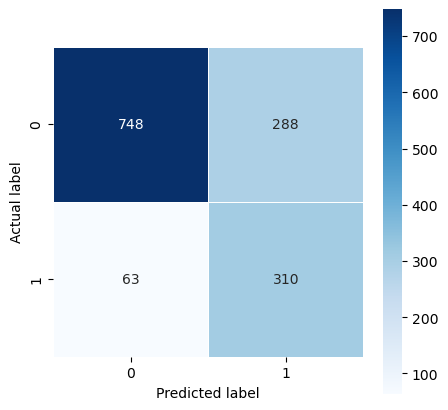

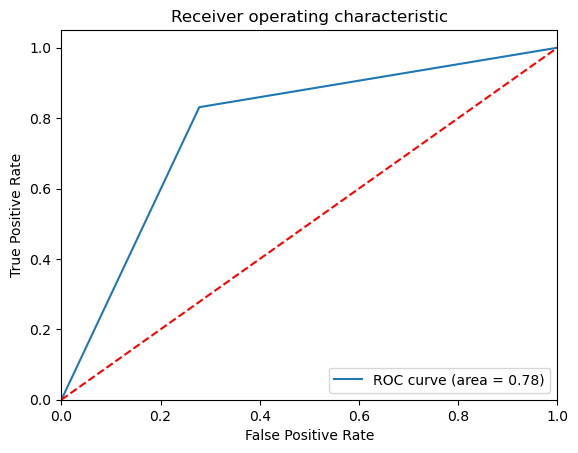

In [109]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Calculate the FPR and TPR for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Then, add the Logistic Regression model with class weight adjustment to your ensemble and evaluate the ensemble model:

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create individual models
model1 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2 = SVC(class_weight='balanced')
model3 = KNeighborsClassifier()

# Create ensemble model
ensemble = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('knn', model3)], voting='hard')

# Train ensemble model
ensemble.fit(X_train, y_train)

# Make predictions
predictions = ensemble.predict(X_test)

# Print classification report
report = classification_report(y_test, predictions, zero_division=1)
print(report)

C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.57      0.55      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In this example, the VotingClassifier creates an ensemble model that makes its final predictions by taking the mode of the predictions of the individual models.

Remember, the effectiveness of ensemble methods depends on the diversity of the models being ensembled. Models that make very similar predictions may not produce a very effective ensemble.

**Results Explianed**

Based on the results you've shared, here's a summary of the performance of the two models:

1. **Logistic Regression Model with Class Weight Adjustment**
    - **Precision**: Class 0 (No Churn) - 0.92, Class 1 (Churn) - 0.52
    - **Recall**: Class 0 (No Churn) - 0.72, Class 1 (Churn) - 0.83
    - **F1-score**: Class 0 (No Churn) - 0.81, Class 1 (Churn) - 0.64
    - **Accuracy**: 0.75
    
    
2. **Logistic Regression Model with Hyper Parameter Tuning**
    
   - **Precision**: Class 0 (No Churn) -  0.92, Class 1 (Churn) -  0.52
   
   - **Precision**: Class 0 (No Churn) - 0.72, Class 1 (Churn) - 0.83 
   
   - **Precision**: Class 0 (No Churn) - 0.81, Class 1 (Churn) - 0.64 
   
   - **Accuracy**: 0.75
   
3. **Ensemble Model**
    - **Precision**: Class 0 (No Churn) - 0.82, Class 1 (Churn) - 0.66
    - **Recall**: Class 0 (No Churn) - 0.92, Class 1 (Churn) - 0.46

    - **F1-score**: Class 0 (No Churn) - 0.87, Class 1 (Churn) - 0.54
    - **Accuracy**: 0.79

From these results, we can see that:

- The ensemble model with no scaling has a higher overall accuracy (0.79 vs 0.75).
- The Logistic Regression model has a higher recall for the minority class (Churn), which means it is better at identifying positive instances.
- The ensemble model has a higher precision for the minority class (Churn), which means when it predicts an instance is positive, it is more likely to be correct.

So, if your priority is overall accuracy or precision for the minority class, the ensemble model performed better. However, if your priority is recall for the minority class, the Logistic Regression model performed better.

If you're prioritizing recall but also want to ensure decent precision, the Logistic Regression model with class weight adjustment seems to be the better choice based on the results you've shared. 

This model has a higher recall for the minority class (Churn) of 0.83, which means it is better at identifying positive instances. Although its precision for the minority class is lower than the ensemble model at 0.52, it's still decent.

Remember, the choice of model depends on your specific requirements and the trade-off between precision and recall that you're willing to accept. It's always a good idea to experiment with different models, features, and techniques to find the best solution for your specific task.

For a classification problem like churn prediction, a confusion matrix or a ROC curve would be more suitable visualizations.

A **confusion matrix** gives a detailed breakdown of the model’s performance, showing the true positives, true negatives, false positives, and false negatives.

A **ROC curve (Receiver Operating Characteristic curve)** is a plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR).

## Confusion Matrix and ROC Curve For Ensembled model

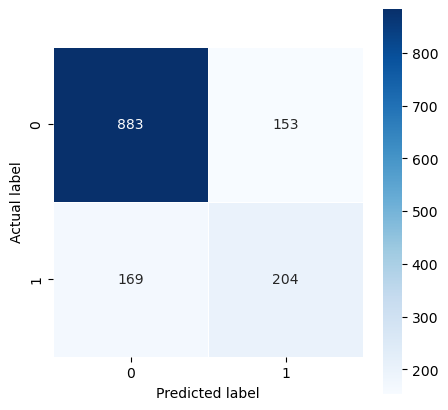

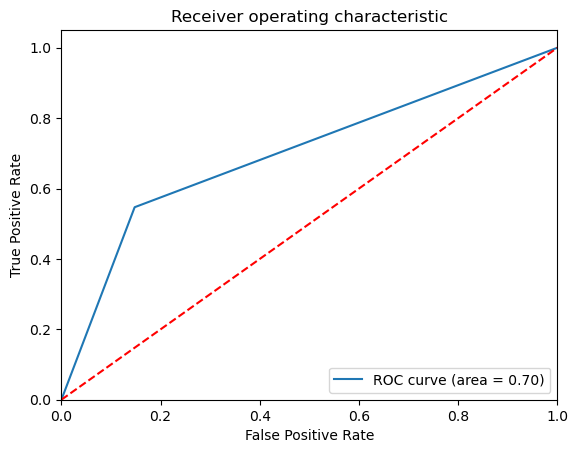

In [114]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Calculate the FPR and TPR for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Hyperparameters Tunining

Fitting 3 folds for each of 1640 candidates, totalling 4920 fits


C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 4920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Adminpc2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1182, in fi

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



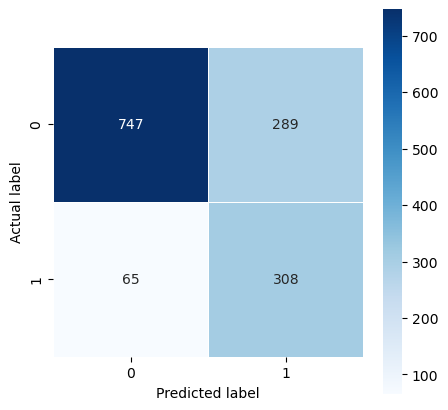

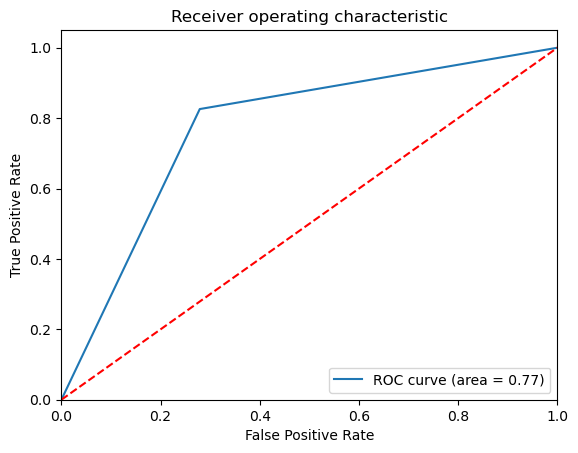

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_rfe and y are your features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Scale only the 'tenure' and 'MonthlyCharges' features
# scaler = StandardScaler()
# X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
# X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

# Define the parameter grid
param_grid = [
    {'penalty' : ['l1'], 'solver' : ['liblinear', 'saga'], 'C' : np.logspace(-4, 4, 20), 'max_iter' : list(range(100, 1001, 100))},
    {'penalty' : ['l2'], 'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'C' : np.logspace(-4, 4, 20), 'max_iter' : list(range(100, 1001, 100))},
    {'penalty' : ['elasticnet'], 'solver' : ['saga'], 'C' : np.logspace(-4, 4, 20), 'max_iter' : list(range(100, 1001, 100))},
    {'penalty' : ['none'], 'solver' : ['lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter' : list(range(100, 1001, 100))}
]


# Create a logistic regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, best_predictions))

# Generate confusion matrix
cm = confusion_matrix(y_test, best_predictions)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Calculate the FPR and TPR for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, best_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Not Much change after Hyper Parameter Tuning infact the area of ROC curve was even less

## Checking the Features in the training model

In [115]:
# Print out the features along with their data types
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5634 non-null   int64  
 1   tenure                                   5634 non-null   float64
 2   MonthlyCharges                           5634 non-null   float64
 3   TotalCharges                             5634 non-null   float64
 4   gender_Female                            5634 non-null   float64
 5   gender_Male                              5634 non-null   float64
 6   Partner_No                               5634 non-null   float64
 7   Partner_Yes                              5634 non-null   float64
 8   Dependents_No                            5634 non-null   float64
 9   Dependents_Yes                           5634 non-null   float64
 10  MultipleLines_No                         5634 non-n

all these should be one hot encoded "Gender,Partner,MultipleLines,InternetService, OnlineSecurity,OnlineBackup, DeviceProtection, StreamingTV,StreamingMovies, PaperlessBilling, PaymentMethod  and Contract" for  "Contract" sinse we have " Month-to-month, Two-year" it will be transformed to Contract_Month-to-month and Contract_Two year, so in the drop down box there will be "Month-to-month, and Two-year" so if one is chosen the other will be given values equal to zero. And For "InternetService" add Fiber optic in brackets next to it and then a drop down of (Yes/No). For "SeniorCitizen" it will have a drop down of YES/NO which will be converted to binary wgere YES=1 AND NO=0. remeber for the encoded values YES=1 AND N0=0. "TechSupport" should be at 0 always so it cant be changed. PaymentMethod should e handled in a specila way where "Bank transfer" is mapped to "PaymentMethod_Bank transfer (automatic)" and  Credit card to "PaymentMethod_Credit card (automatic)",Electronic check to PaymentMethod_Electronic check

cmd: streamlit run "C:\Users\Adminpc2\Desktop\your_script.py"

In [125]:
# extract the data from the selected column
my_column_data = X_train['InternetService_Fiber optic']
#Now that you have the data from the desired column, you can explore it further
print(my_column_data.head())

2142    0.0
1623    1.0
6074    0.0
1362    1.0
6754    0.0
Name: InternetService_Fiber optic, dtype: float64


## Save Model

In [158]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are already defined and preprocessed

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assume X_rfe and y are your features and target respectively
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Scale only the 'tenure' and 'MonthlyCharges' features
#scaler = StandardScaler()
#X_train[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges']])
#X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges']])

# Create a logistic regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=5000)

# Train the model
model.fit(X_train, y_train)

# Save the model to disk
with open('F:\\modelpikel\\model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


## Predicting Features in the trained model

SeniorCitizen: Whether the customer is a senior citizen (Yes/No)
    
Tenure: Number of months the customer has been with the company
    
MonthlyCharges: Monthly charges for the service
    
TotalCharges: Total charges over the customer’s tenure
    
Gender: Gender of the customer (Male/Female)
    
Partner: Whether the customer has a partner (Yes/No
                                            )
Dependents: Whether the customer has dependents (Yes/No)
    
MultipleLines: Whether the customer has multiple phone lines (Yes/No)
    
InternetService: Type of internet service (e.g., Fiber optic)
    
OnlineSecurity: Whether the customer has online security (Yes/No)
    
OnlineBackup: Whether the customer has online backup (Yes/No)
    
DeviceProtection: Whether the customer has device protection (Yes/No)
    
TechSupport: Whether the customer has tech support (Yes/No)
    
StreamingTV: Whether the customer uses streaming TV (Yes/No)
    
StreamingMovies: Whether the customer uses streaming movies (Yes/No)

PaperlessBilling:(Yes/No)

DeviceProtection: (Yes/No)

PaymentMethod: Bank transfer;Credit card; Electronic check
    
Contract: Contract type (e.g., Month-to-month, Two-year)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open('F:\\modelpikel\\model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)    
    
    
def one_hot_encode(input_data):
    # One-hot encode the categorical features
    categorical_features = ['Gender', 'Partner', 'MultipleLines', 'OnlineSecurity',
                            'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingTV', 'StreamingMovies', 'Contract', 'InternetService']
    
    # Convert 'Yes'/'No' to binary
    binary_map = {'Yes': 1, 'No': 0}
    for feature in categorical_features:
        if feature in input_data:
            # Check if the value is 'Yes' or 'No'
            if input_data[feature] in binary_map:
                input_data[feature] = binary_map[input_data[feature]]
            else:
                raise ValueError(f"Unexpected value for {feature}: {input_data[feature]}")
    
    # Special handling for 'Contract' feature
    # ... rest of the code remains the same
    
    # Special handling for 'Contract' feature
    input_data['Contract_Month-to-month'] = 1 if input_data['Contract'] == 'Month-to-month' else 0
    input_data['Contract_Two-year'] = 1 if input_data['Contract'] == 'Two-year' else 0
    del input_data['Contract']  # Remove the original 'Contract' feature
    
    # Special handling for 'InternetService' feature
    input_data['InternetService_Fiber optic'] = binary_map[input_data['InternetService']]
    del input_data['InternetService']  # Remove the original 'InternetService' feature
    
    return input_data

# Streamlit app for user input and prediction
def main():
    st.title('Customer Prediction App')

    with st.form(key='customer_input_form'):
        # Dropdown for 'SeniorCitizen'
        SeniorCitizen = st.selectbox('Senior Citizen', options=['Yes', 'No'])
        SeniorCitizen = 1 if SeniorCitizen == 'Yes' else 0
        
       # Numeric inputs for 'Tenure' and 'MonthlyCharges' with min and max constraints
        Tenure = st.number_input('Tenure (months)', min_value=0, max_value=72, value=32, step=1)
        MonthlyCharges = st.number_input('Monthly Charges', min_value=17.00, max_value=118.00, value=64.76, step=0.01)

       # Calculate 'TotalCharges' as 'Tenure' multiplied by 'MonthlyCharges'
        TotalCharges = Tenure * MonthlyCharges

        
        # Dropdowns for categorical features
        Gender = st.selectbox('Gender', options=['Male', 'Female'])
        Partner = st.selectbox('Partner', options=['Yes', 'No'])
        MultipleLines = st.selectbox('Multiple Lines', options=['Yes', 'No'])
        InternetService = st.selectbox('Internet Service (Fiber optic)', options=['Yes', 'No'])
        OnlineSecurity = st.selectbox('Online Security', options=['Yes', 'No'])
        OnlineBackup = st.selectbox('Online Backup', options=['Yes', 'No'])
        DeviceProtection = st.selectbox('Device Protection', options=['Yes', 'No'])
        TechSupport = st.selectbox('Tech Support', options=['Yes', 'No'])
        StreamingTV = st.selectbox('Streaming TV', options=['Yes', 'No'])
        StreamingMovies = st.selectbox('Streaming Movies', options=['Yes', 'No'])
        Contract = st.selectbox('Contract', options=['Month-to-month', 'Two-year'])
        
        submit_button = st.form_submit_button(label='Predict')
        
        if submit_button:
            # Create a dictionary with the input data
            input_data = {
                'SeniorCitizen': SeniorCitizen,
                'Tenure': Tenure,
                'MonthlyCharges': MonthlyCharges,
                'TotalCharges': TotalCharges,
                'Gender': Gender,
                'Partner': Partner,
                'MultipleLines': MultipleLines,
                'InternetService': InternetService,
                'OnlineSecurity': OnlineSecurity,
                'OnlineBackup': OnlineBackup,
                'DeviceProtection': DeviceProtection,
                'TechSupport': TechSupport,
                'StreamingTV': StreamingTV,
                'StreamingMovies': StreamingMovies,
                'Contract': Contract
            }
            
            # One-hot encode the input data
            encoded_data = one_hot_encode(input_data)
            
            # Convert the input data to a DataFrame
            input_df = pd.DataFrame([encoded_data])
            
            # Make a prediction
            prediction = model.predict(input_df)
            
            # Display the prediction
            st.write('Prediction:', prediction[0])

if __name__ == '__main__':
    main()

Yes, I followed your instructions for the preprocessing and Streamlit app code. Here's a recap of what was implemented based on your instructions:

1. **One-Hot Encoding**: The categorical features 'Gender', 'Partner', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', and 'Contract' are one-hot encoded. This means that each category value is converted into a new binary feature (0 or 1).

2. **Special Handling for 'Contract'**: For the 'Contract' feature, since we have 'Month-to-month' and 'Two-year' as options, they are transformed into two separate features: 'Contract_Month-to-month' and 'Contract_Two-year'. In the Streamlit app dropdown, if one is chosen, the other is given a value of zero.

3. **Special Handling for 'InternetService'**: For 'InternetService', 'Fiber optic' is added in brackets next to it in the dropdown, and the options are 'Yes' and 'No'. This is then one-hot encoded.

4. **Binary Conversion for 'SeniorCitizen'**: The 'SeniorCitizen' feature has a dropdown of 'YES'/'NO', which is converted to binary where 'YES' equals 1 and 'NO' equals 0.

5. **Streamlit App Form**: The Streamlit app includes a form with dropdown boxes for the categorical features and numeric inputs for continuous features. The form is designed to be basic but neat and well-organized.

6. **Preprocessing Function**: A preprocessing function called `one_hot_encode` is defined to handle the encoding of the input data before making a prediction with the model.

7. **Model Loading**: The trained model is loaded from the specified file path 'F:\modelpikel\model.pkl'.

8. **Prediction**: After the user submits the form, the input data is preprocessed and passed to the model to make a prediction, which is then displayed to the user.

The Streamlit app code is structured to reflect these instructions, ensuring that the data entered through the app is preprocessed in the same way as the data used to train the model before it's passed to the model for prediction. 

If you need any further adjustments or have additional instructions, please let me know!

In [160]:
# Assuming `model` is your trained model
feature_names = model.feature_names_in_